<h3><center>iNeuron End to End Machine Learning Project Live</center></h3>
<h4><center>Student Performance Indicator</center></h4>
<center>Exploratory Data Analysis</center>

#### Problem Statement:
 - This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

##### Dataset Source:
 - Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
 - The data consists of 8 column and 1000 rows.

In [86]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
# read the dataset
df = pd.read_csv('data/StudentsPerformance.csv')

# check the dimensions of the data
df.shape

(1000, 8)

In [88]:
# show first 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<h4>Dataset Information:</h4>

 - gender : sex of students -> (Male/female)
 - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
 - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
 - lunch : having lunch before test (standard or free/reduced)
 - test preparation course : complete or not complete before test
 - math score
 - reading score
 - writing score

In [89]:
# check datatypes present
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [90]:
# descriptive statistics
df.describe().round(2)

,math score,reading score,writing score
count,1000.00,1000.00,1000.00
mean,66.09,69.17,68.05
std,15.16,14.60,15.20
min,0.00,17.00,10.00
25%,57.00,59.00,57.75
50%,66.00,70.00,69.00
75%,77.00,79.00,79.00
max,100.00,100.00,100.00


 - From above description of numerical data, all means are very close to each other - between 66 and 68.05;
 - All standard deviations are also close - between 14.6 and 15.19;
 - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [91]:
# concise information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [92]:
# unique values
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [93]:
# missing/null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [94]:
# duplicate records
df.duplicated().sum()

0

In [95]:
# categories present in categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [96]:
for i in categorical_features:
    print("categories present in", i, ":\n", df[i].unique())

categories present in gender :
 ['female' 'male']
categories present in race/ethnicity :
 ['group B' 'group C' 'group A' 'group D' 'group E']
categories present in parental level of education :
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories present in lunch :
 ['standard' 'free/reduced']
categories present in test preparation course :
 ['none' 'completed']


In [97]:
# let's add columns like total_score and average_score
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average_score"] = round(df["total_score"]/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [98]:
# no of students who scored full marks in the subjects
def full_marks(data):
    math_full = data[data["math score"]==100]["average_score"].count()
    reading_full = data[data["reading score"]==100]["average_score"].count()
    writing_full = data[data["writing score"]==100]["average_score"].count()

    print("Number of Students who scored full marks in maths:", math_full)
    print("Number of Students who scored full marks in reading:", reading_full)
    print("Number of Students who scored full marks in writing:", writing_full)

In [99]:
# no of students who scored full marks in the subjects
full_marks(df)

Number of Students who scored full marks in maths: 7
Number of Students who scored full marks in reading: 17
Number of Students who scored full marks in writing: 14


In [100]:
# no of students failed in the subjects
def fail_marks(data):
    math_fail = data[data["math score"]<30]["average_score"].count()
    reading_fail = data[data["reading score"]<30]["average_score"].count()
    writing_fail = data[data["writing score"]<30]["average_score"].count()

    print("Number of Students who failed in maths:", math_fail)
    print("Number of Students who failed in reading:", reading_fail)
    print("Number of Students who failed in writing:", writing_fail)

In [101]:
# no of students failed in the subjects
fail_marks(df)

Number of Students who failed in maths: 14
Number of Students who failed in reading: 8
Number of Students who failed in writing: 9


In [102]:
# no of students who scored zero in the subjects
def zero_marks(data):
    math_zero = data[data["math score"]==0]["average_score"].count()
    reading_zero = data[data["reading score"]==0]["average_score"].count()
    writing_zero = data[data["writing score"]==0]["average_score"].count()

    print("Number of Students who scored zero marks in maths:", math_zero)
    print("Number of Students who scored zero marks in reading:", reading_zero)
    print("Number of Students who scored zero marks in writing:", writing_zero)

In [103]:
# no of students who scored zero in the subjects
zero_marks(df)

Number of Students who scored zero marks in maths: 1
Number of Students who scored zero marks in reading: 0
Number of Students who scored zero marks in writing: 0


<h4>Insights:</h4>
 
 - Students performance is worst in mathematics as per the data analysis above.
 - Students performance is good in reading and writing.
 - There is only 1 student who scored 0 marks in mathematics and in rest other subjects there are no students with 0 marks.

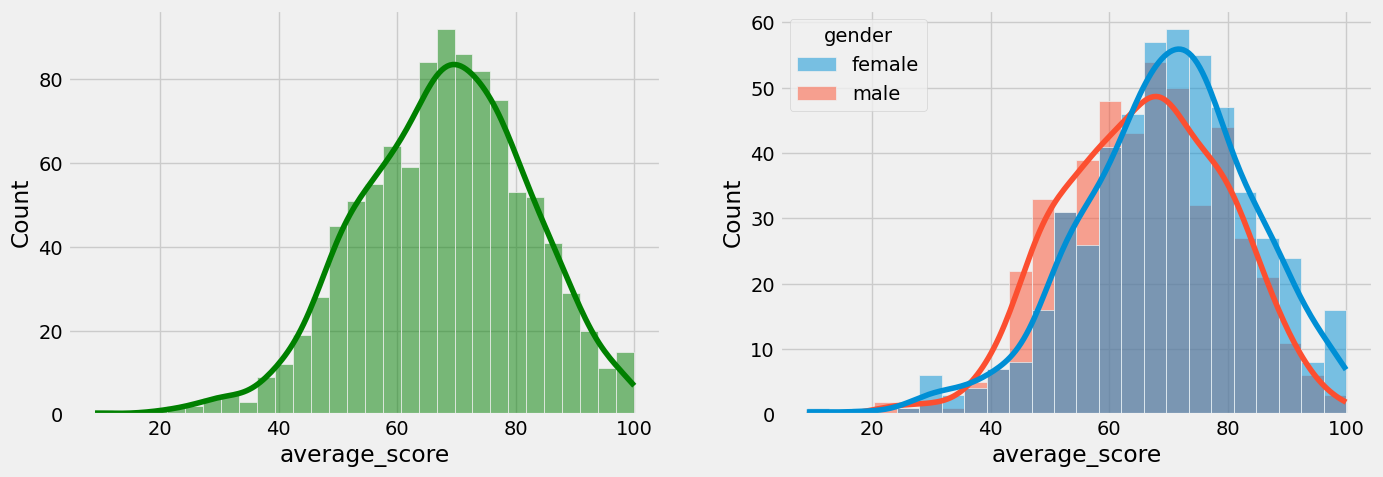

In [104]:
# average_score
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

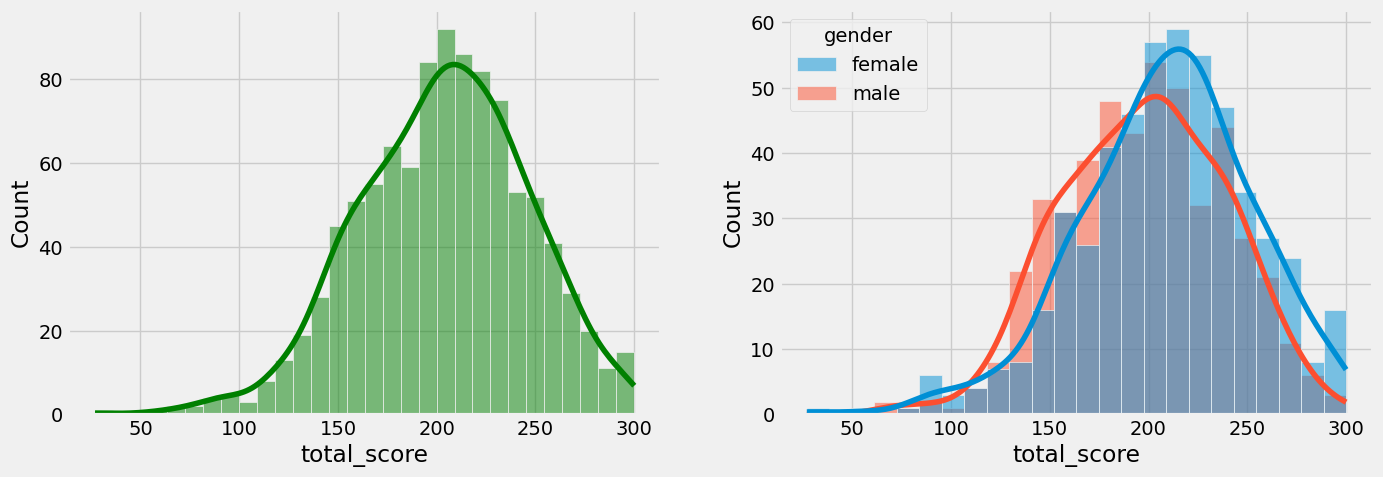

In [105]:
# total_score
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

#### Female students have performed well than male students.

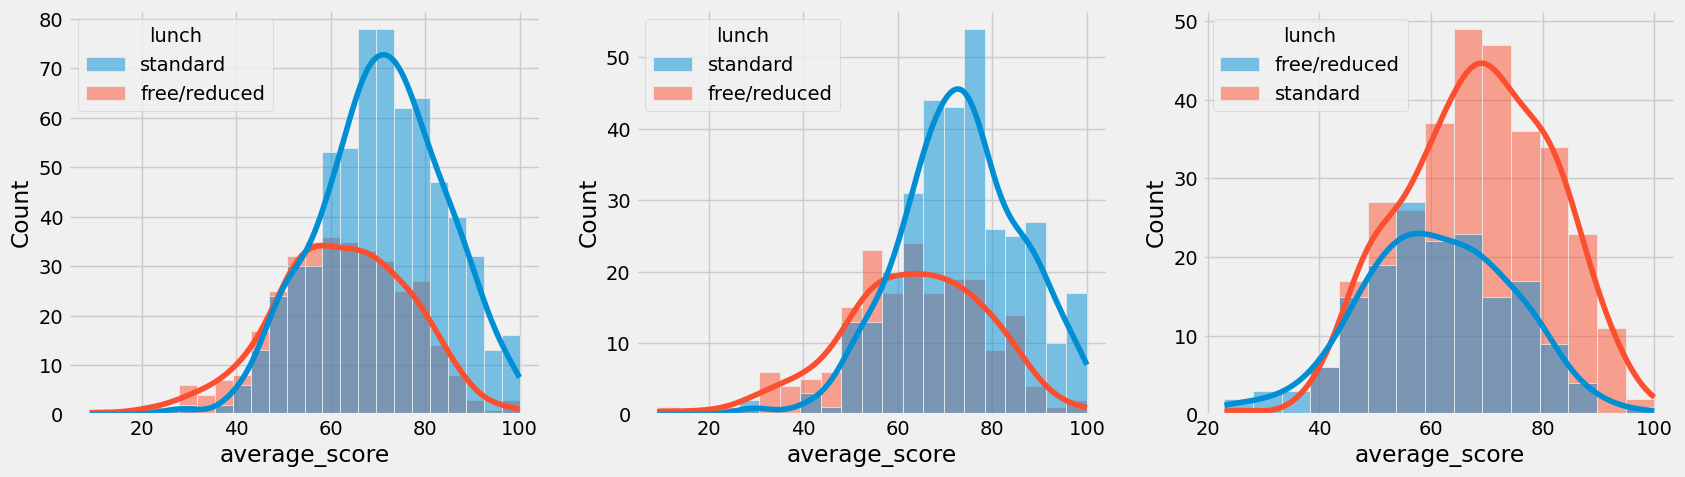

In [106]:
# average_score and lunch
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

#### Standard lunch is helping students perform well in exam irrespective of the gender.

In [107]:
# average_score and parental level of education
df.groupby(['parental level of education','gender'])['average_score'].mean().reset_index()

,parental level of education,gender,average_score
0,associate's degree,female,71.123621
1,associate's degree,male,67.867642
2,bachelor's degree,female,74.672063
3,bachelor's degree,male,68.776182
4,high school,female,64.748404
5,high school,male,61.575490
6,master's degree,female,73.648056
7,master's degree,male,73.521304
8,some college,female,71.002542
9,some college,male,65.715741


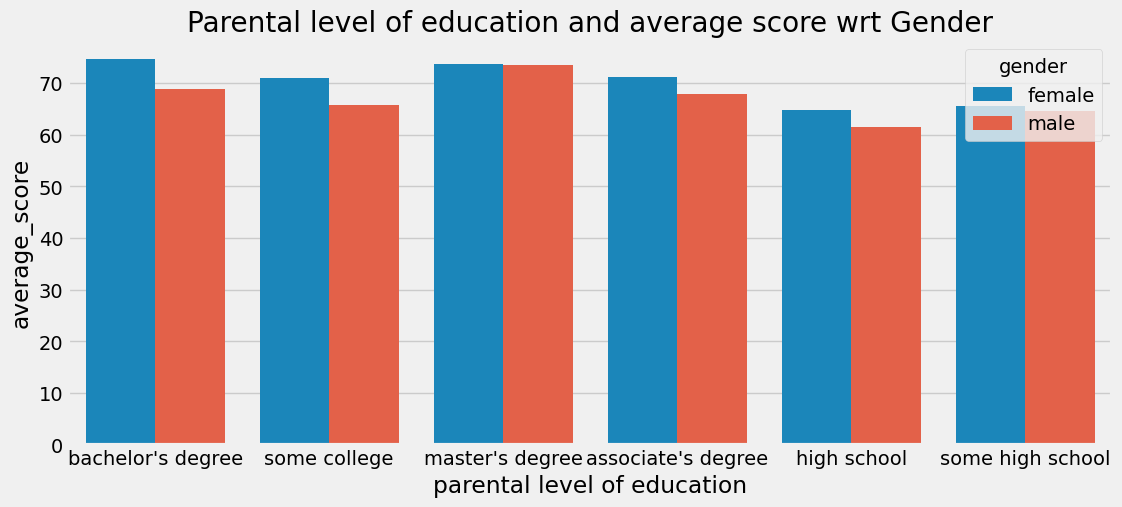

In [108]:
# average_score and parental level of education
plt.figure(figsize=(12,5))
sns.barplot(x='parental level of education', y='average_score', data=df, hue='gender', estimator=np.mean, ci=None)
plt.title("Parental level of education and average score wrt Gender")
plt.show()

#### In general there is no significant role of parental level of education on the students performance according to the data provided. However, if we take a closer look we observed that students whose parental level of education is master's degree or associate's degree performed well in the exams.

In [109]:
# average_score and race/ethnicity
df.groupby(['race/ethnicity','gender'])['average_score'].mean().reset_index()

,race/ethnicity,gender,average_score
0,group A,female,65.129167
1,group A,male,61.540566
2,group B,female,67.510000
3,group B,male,62.999884
4,group C,female,68.585222
5,group C,male,65.249137
6,group D,female,71.439302
7,group D,male,66.987444
8,group E,female,74.062319
9,group E,male,71.478592


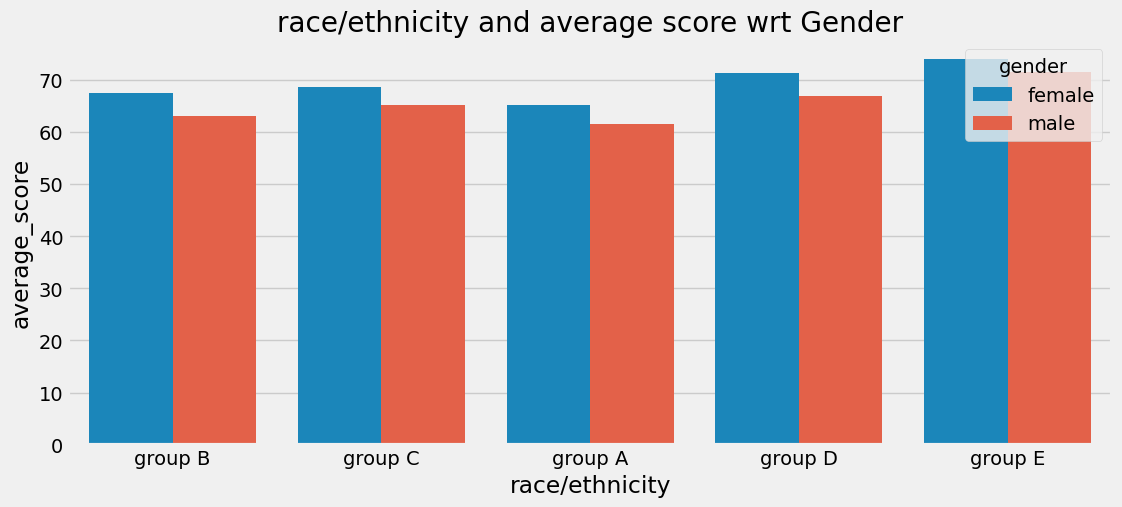

In [110]:
# average_score and race/ethnicity
plt.figure(figsize=(12,5))
sns.barplot(x='race/ethnicity', y='average_score', data=df, hue='gender', estimator=np.mean, ci=None)
plt.title("race/ethnicity and average score wrt Gender")
plt.show()

In [111]:
# average_score and test preparation course
df.groupby(['test preparation course','gender'])['average_score'].mean().reset_index()

,test preparation course,gender,average_score
0,completed,female,74.455000
1,completed,male,70.781322
2,none,female,66.878084
3,none,male,63.044253


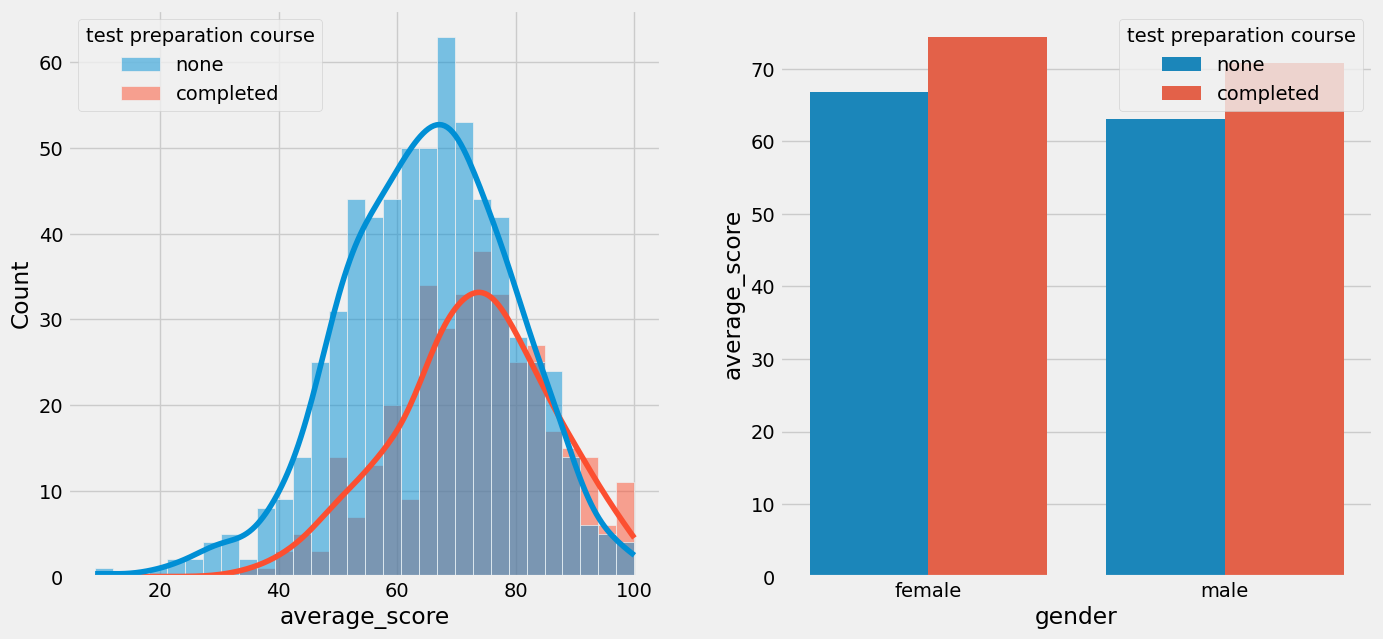

In [112]:
# average_score and test preparation course
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g', hue='test preparation course')

plt.subplot(122)
sns.barplot(data=df, x='gender', y='average_score', hue='test preparation course', ci=None, estimator=np.mean)
plt.show()

#### Students who took a test preparation course have performed better than those who did not.

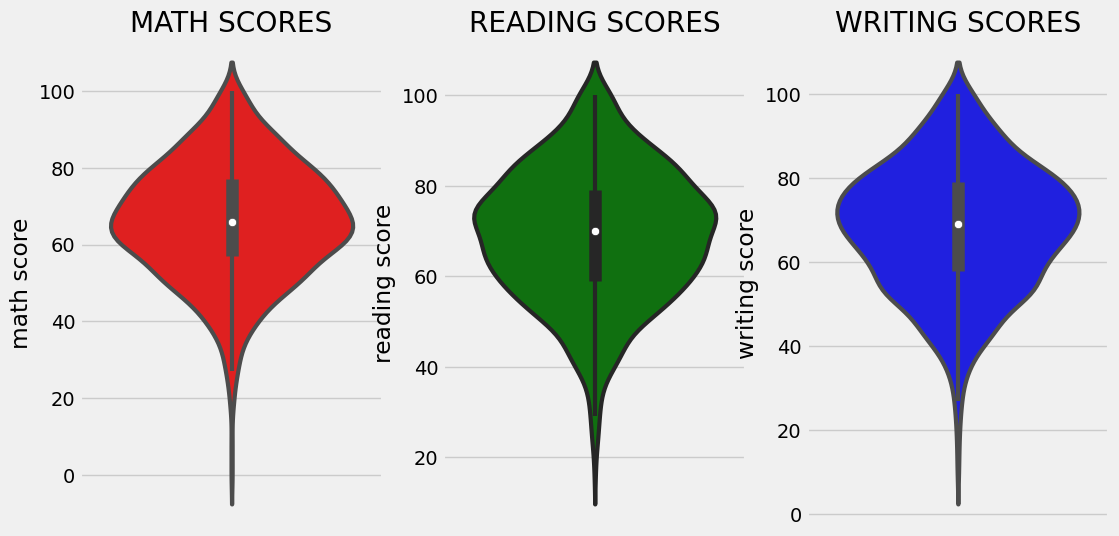

In [113]:
# Maximum score of students in all the 3 subjects
plt.figure(figsize=(16,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

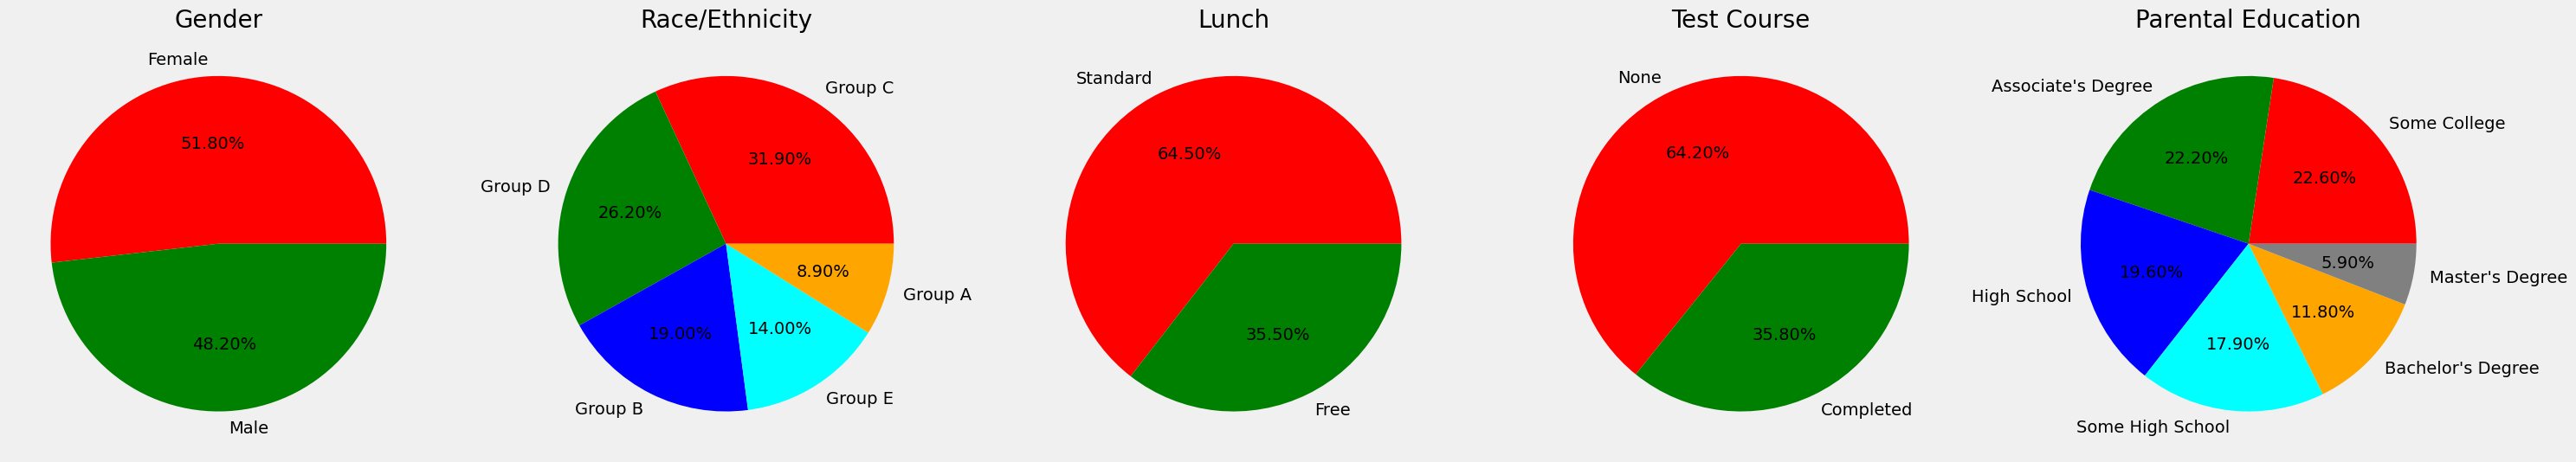

In [114]:
# Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights:
 - Number of Male and Female students is almost equal
 - Number students are greatest in Group C
 - Number of students who have standard lunch are greater
 - Number of students who have not enrolled in any test preparation course is greater
 - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature Wise Visualization
#### GENDER COLUMN
 - How is distribution of Gender ?
 - Is gender has any impact on student's performance ?

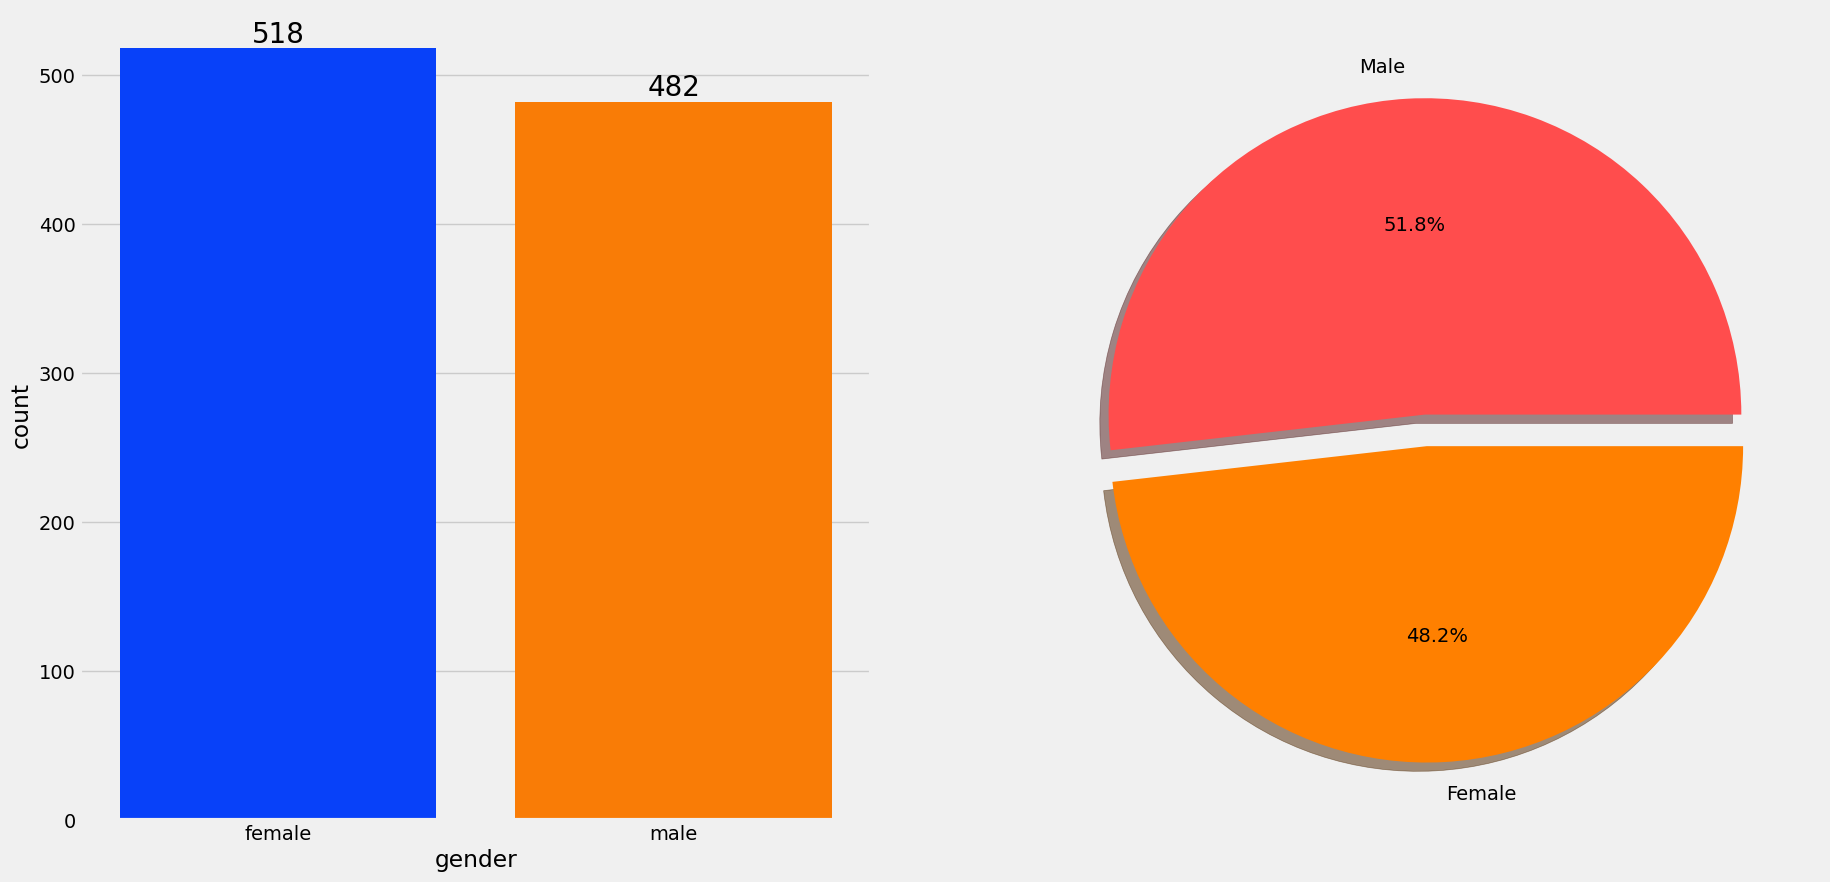

In [115]:
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [116]:
# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


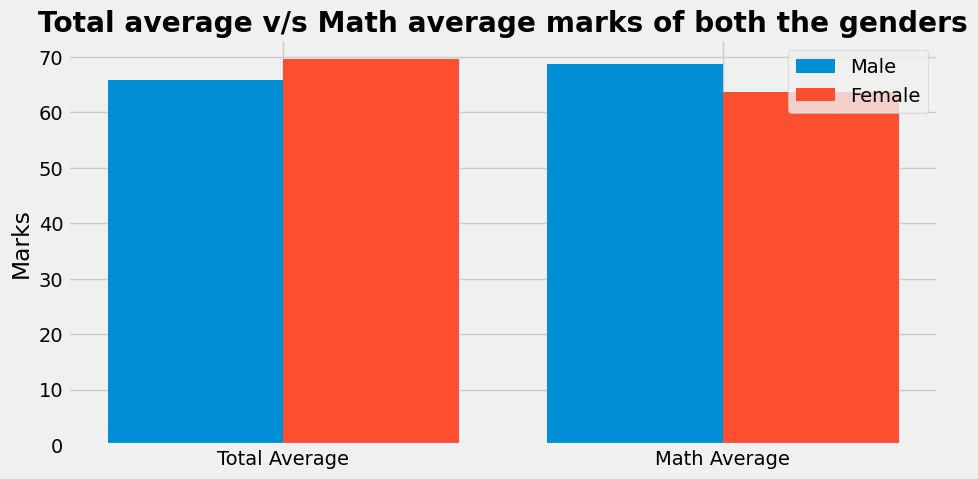

In [117]:
plt.figure(figsize=(10, 5))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
 - On an average females have a better overall score than men.
 - whereas males have scored higher in Maths.

#### RACE/EHNICITY COLUMN
 - How is Group wise distribution ?
 - Is Race/Ehnicity has any impact on student's performance ?

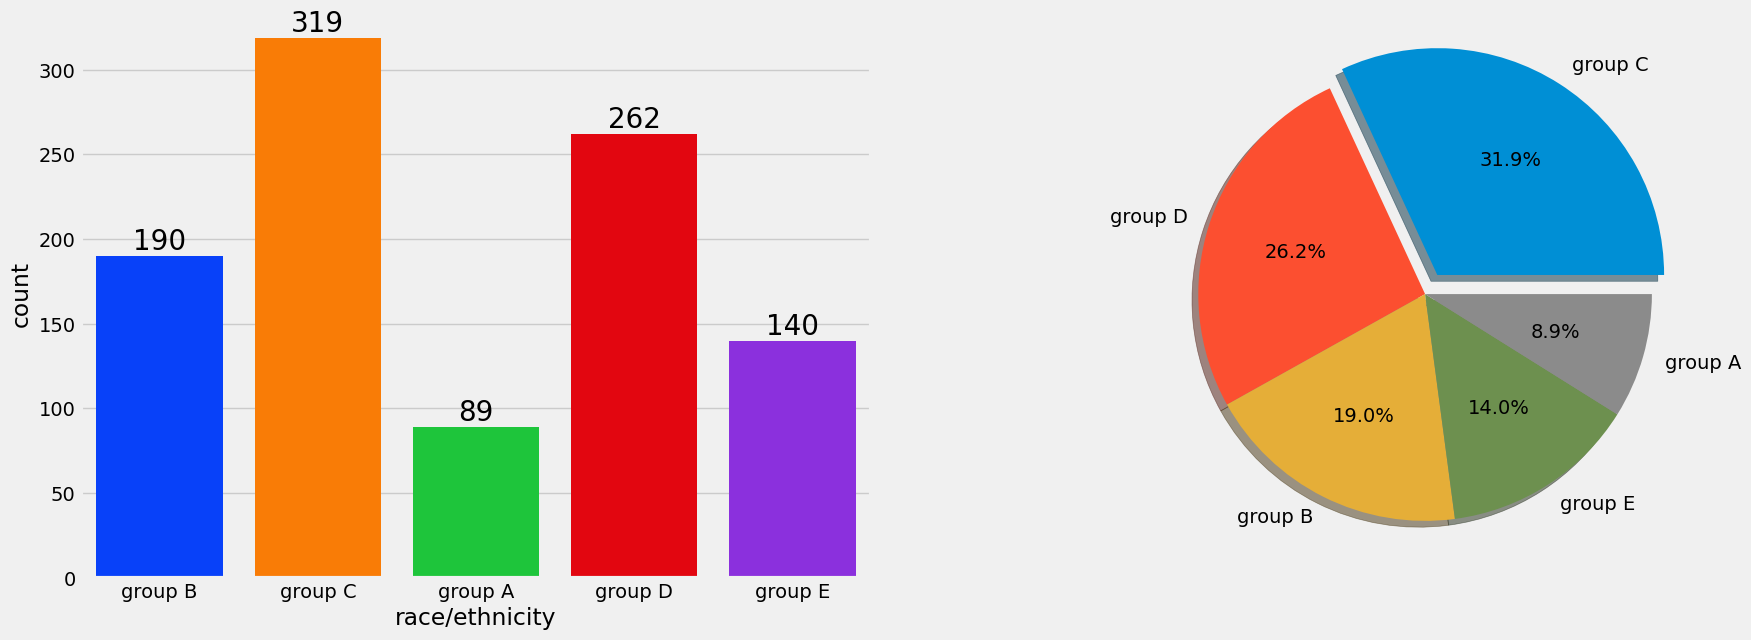

In [118]:
# UNIVARIATE ANALYSIS ( How is Group wise distribution ?)
f,ax=plt.subplots(1,2,figsize=(20,7))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',
shadow=True)
plt.show()

#### Insights
 - Most of the student belonging from group C /group D.
 - Lowest number of students belong to groupA.

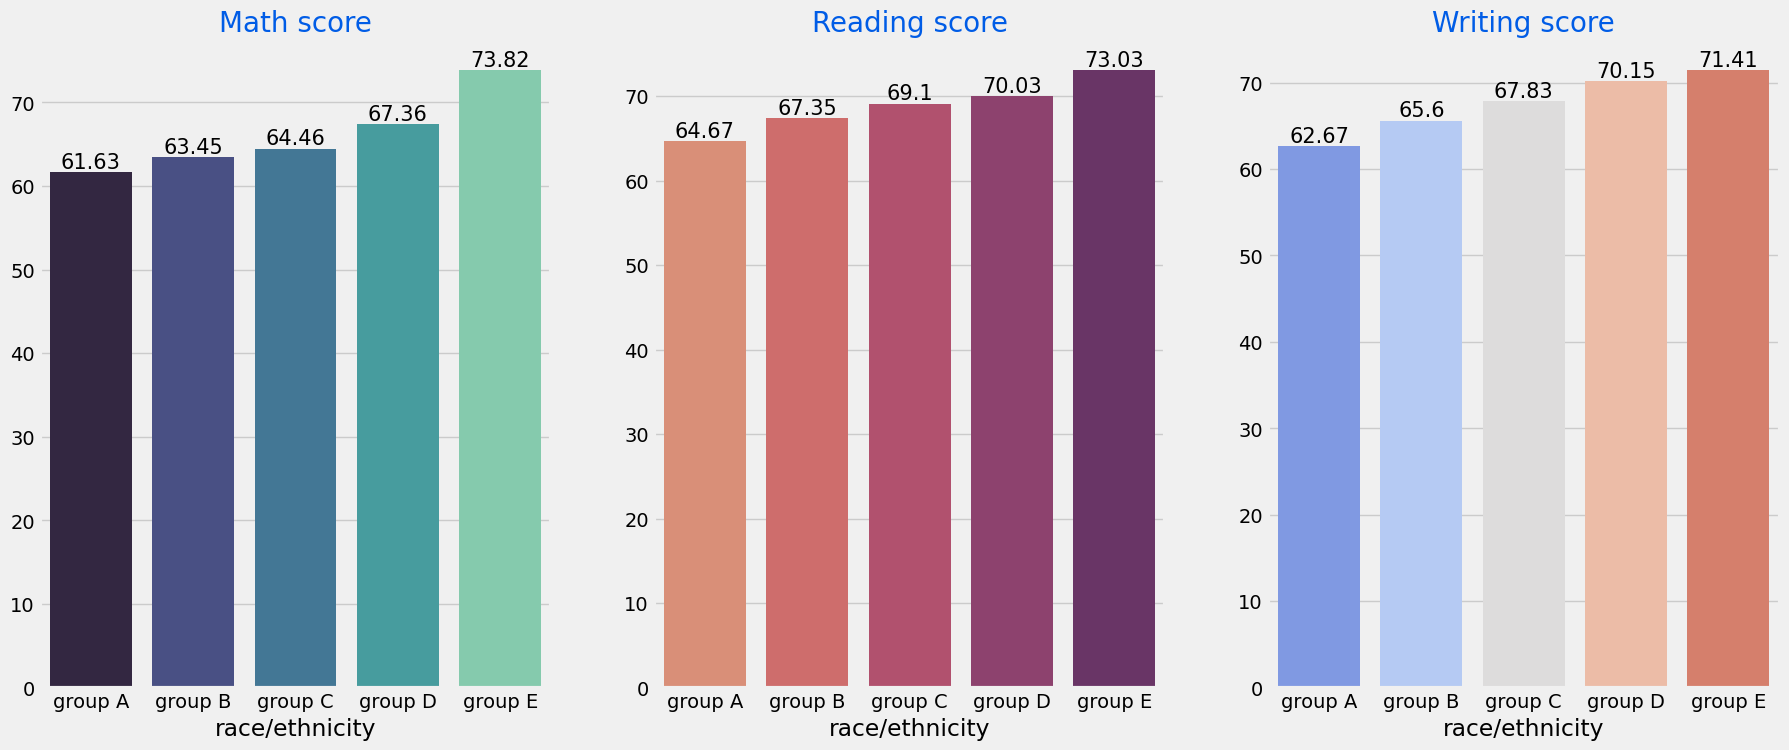

In [119]:
# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().round(2).values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().round(2).values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().round(2).values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
 - Group E students have scored the highest marks.
 - Group A students have scored the lowest marks.
 - Students from a lower Socioeconomic status have a lower avg in all course subjects

#### PARENTAL LEVEL OF EDUCATION COLUMN
 - What is educational background of student's parent ?
 - Is parental education has any impact on student's performance ?

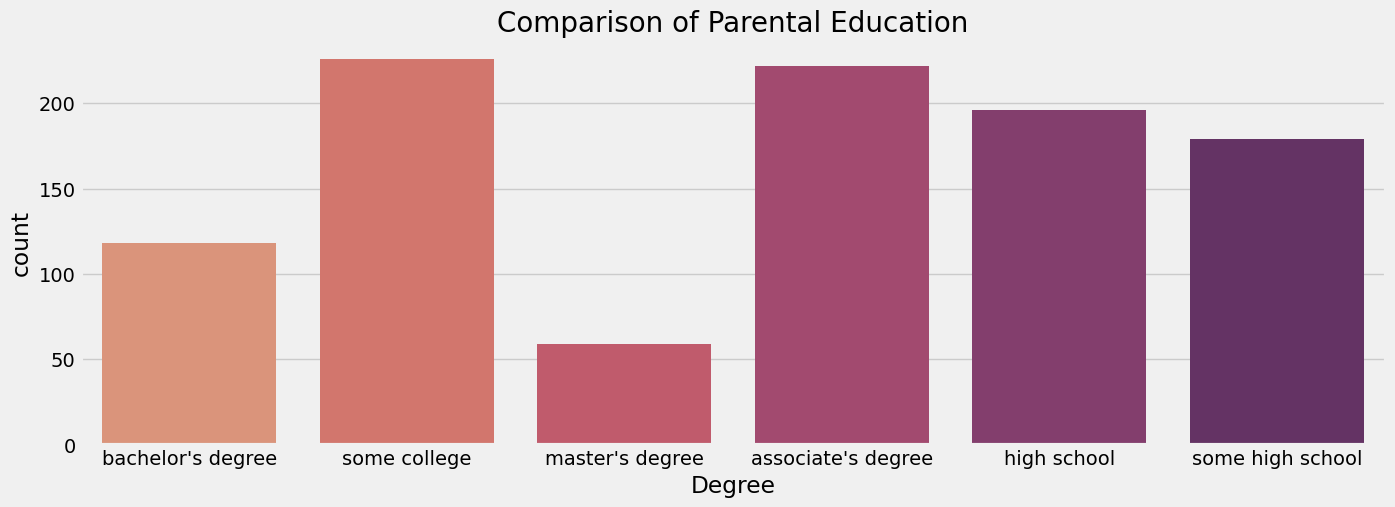

In [120]:
# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette = 'flare')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Largest number of parents are from some college.

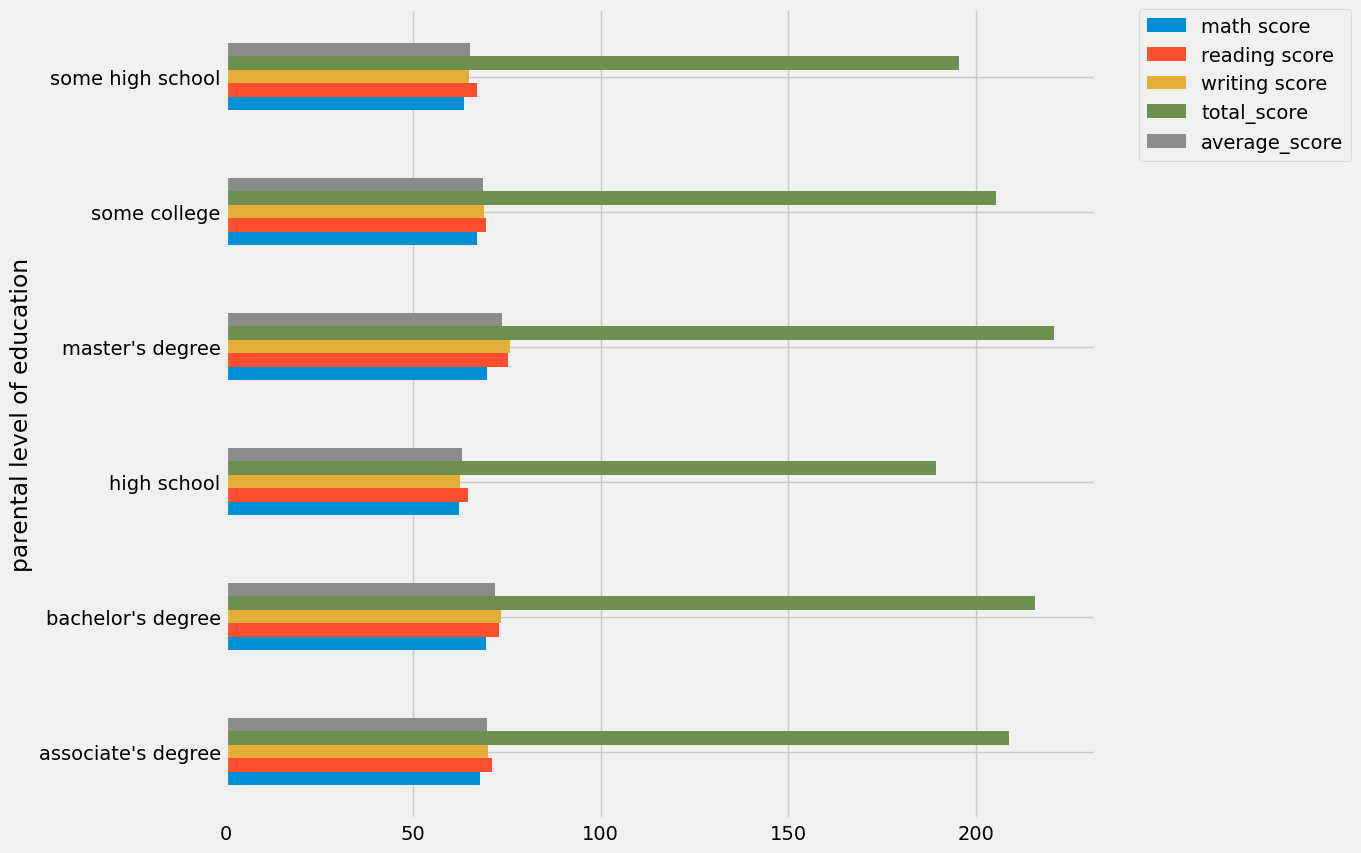

In [121]:
# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### The score of student whose parents possess master and bachelor level education are higher than others.

#### LUNCH COLUMN
 - Which type of lunch is most common amoung students ?
 - What is the effect of lunch type on test results?

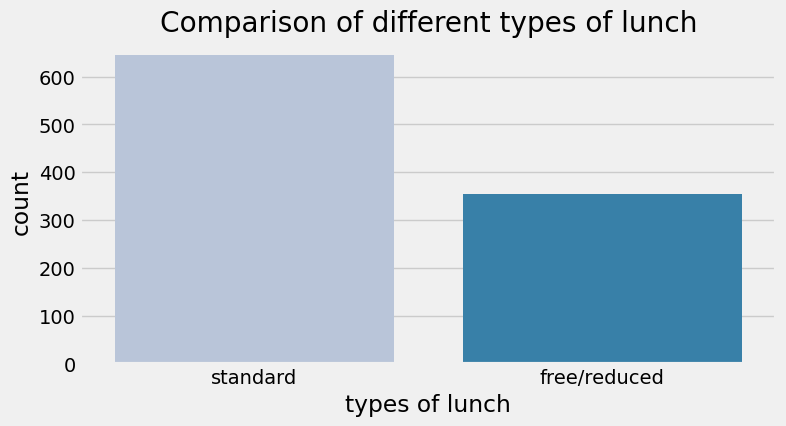

In [122]:
# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )
plt.figure(figsize=(8,4))
sns.countplot(x='lunch', data=df, palette = 'PuBu')
plt.title('Comparison of different types of lunch')
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Students being served Standard lunch was more than free lunch

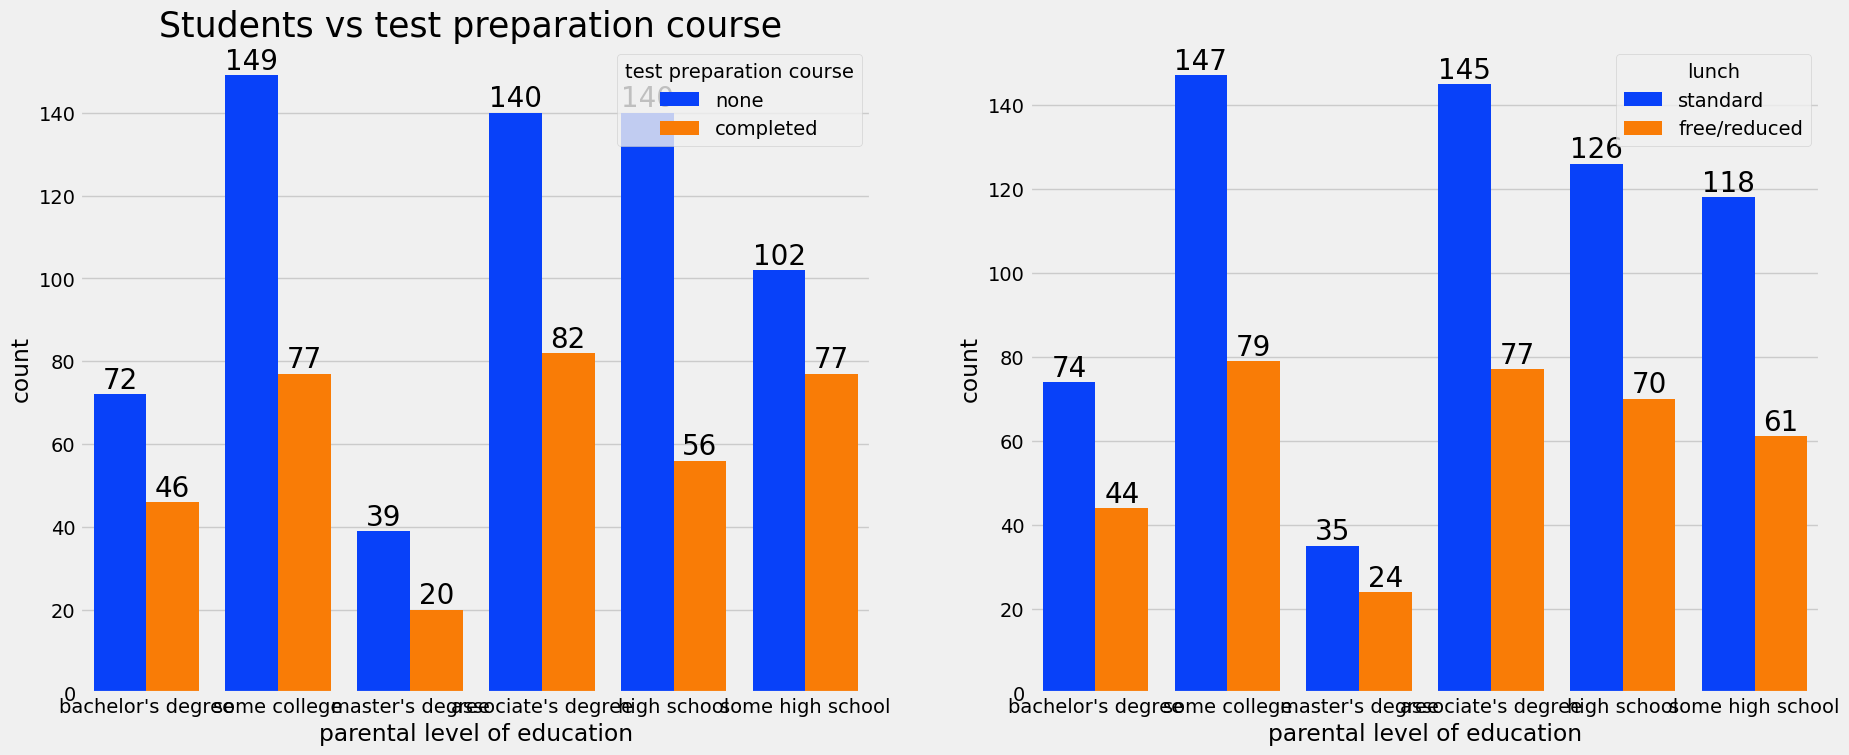

In [123]:
# BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

#### Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### TEST PREPARATION COURSE COLUMN
 - Which type of lunch is most common amoung students ?
 - Is Test prepration course has any impact on student's performance ?

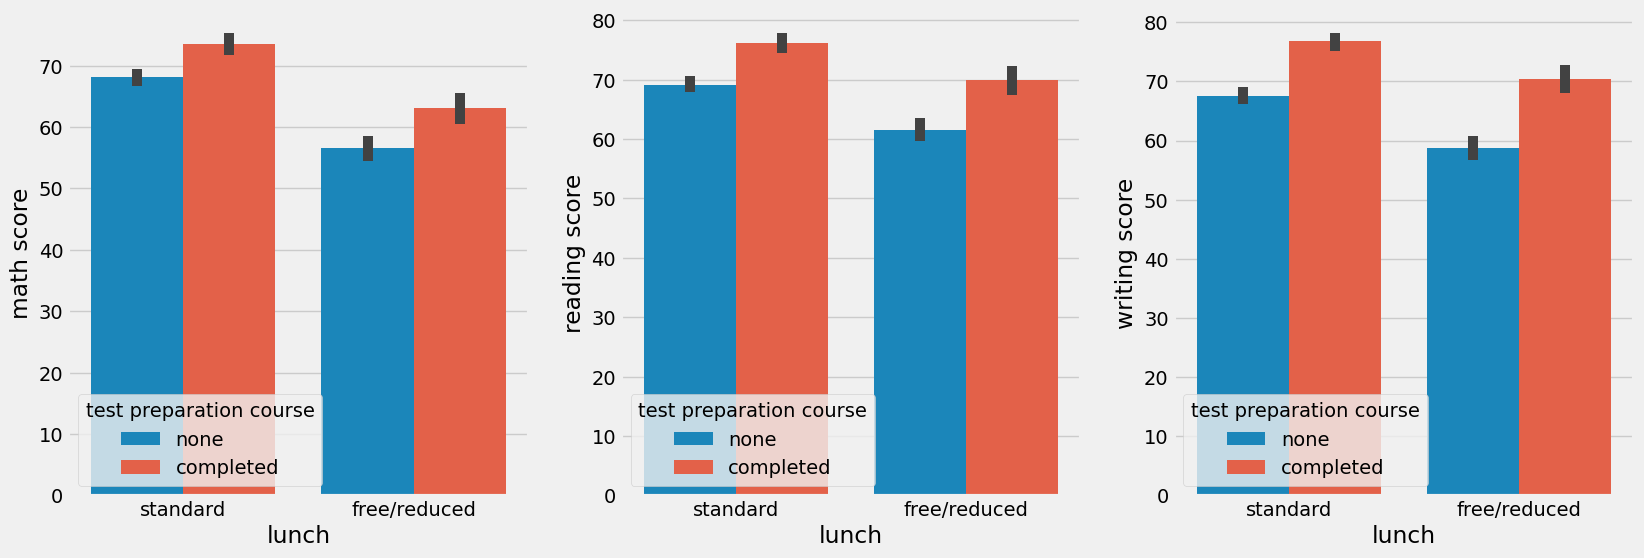

In [124]:
# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(1,3,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(1,3,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.show()

#### Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### CHECKING OUTLIERS

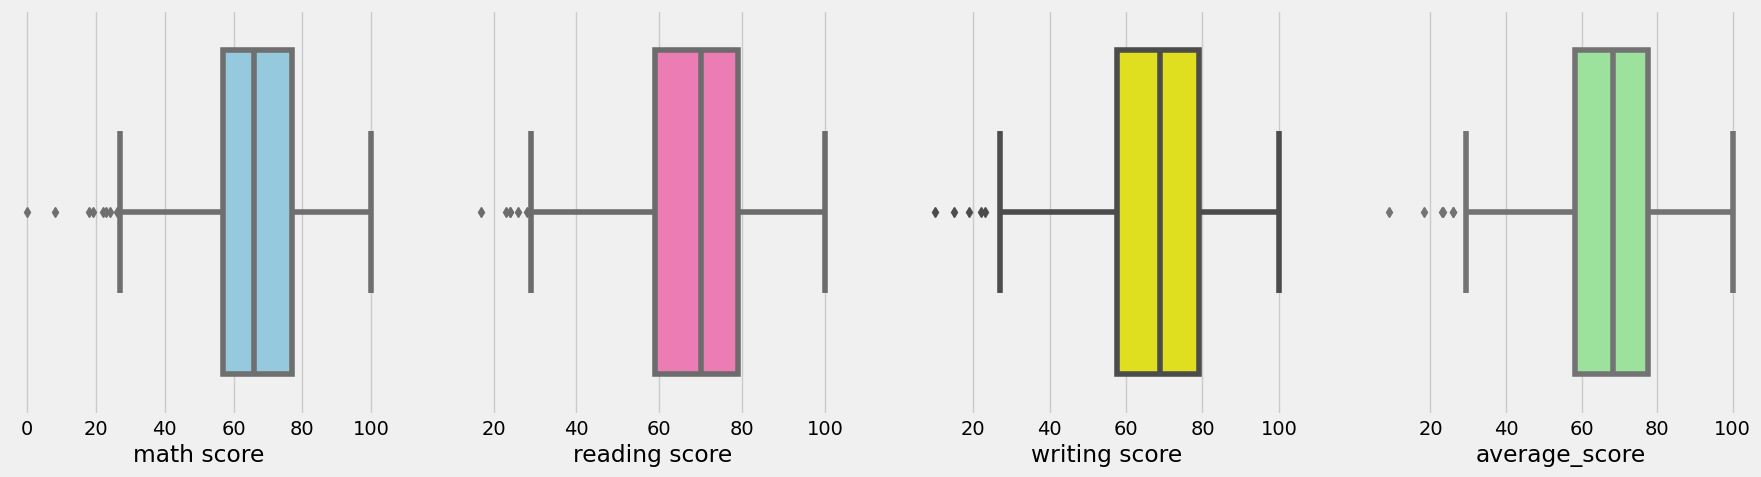

In [125]:
plt.subplots(1,4,figsize=(20,5))
plt.subplot(141)
sns.boxplot(x=df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(x=df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(x=df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(x=df['average_score'],color='lightgreen')
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

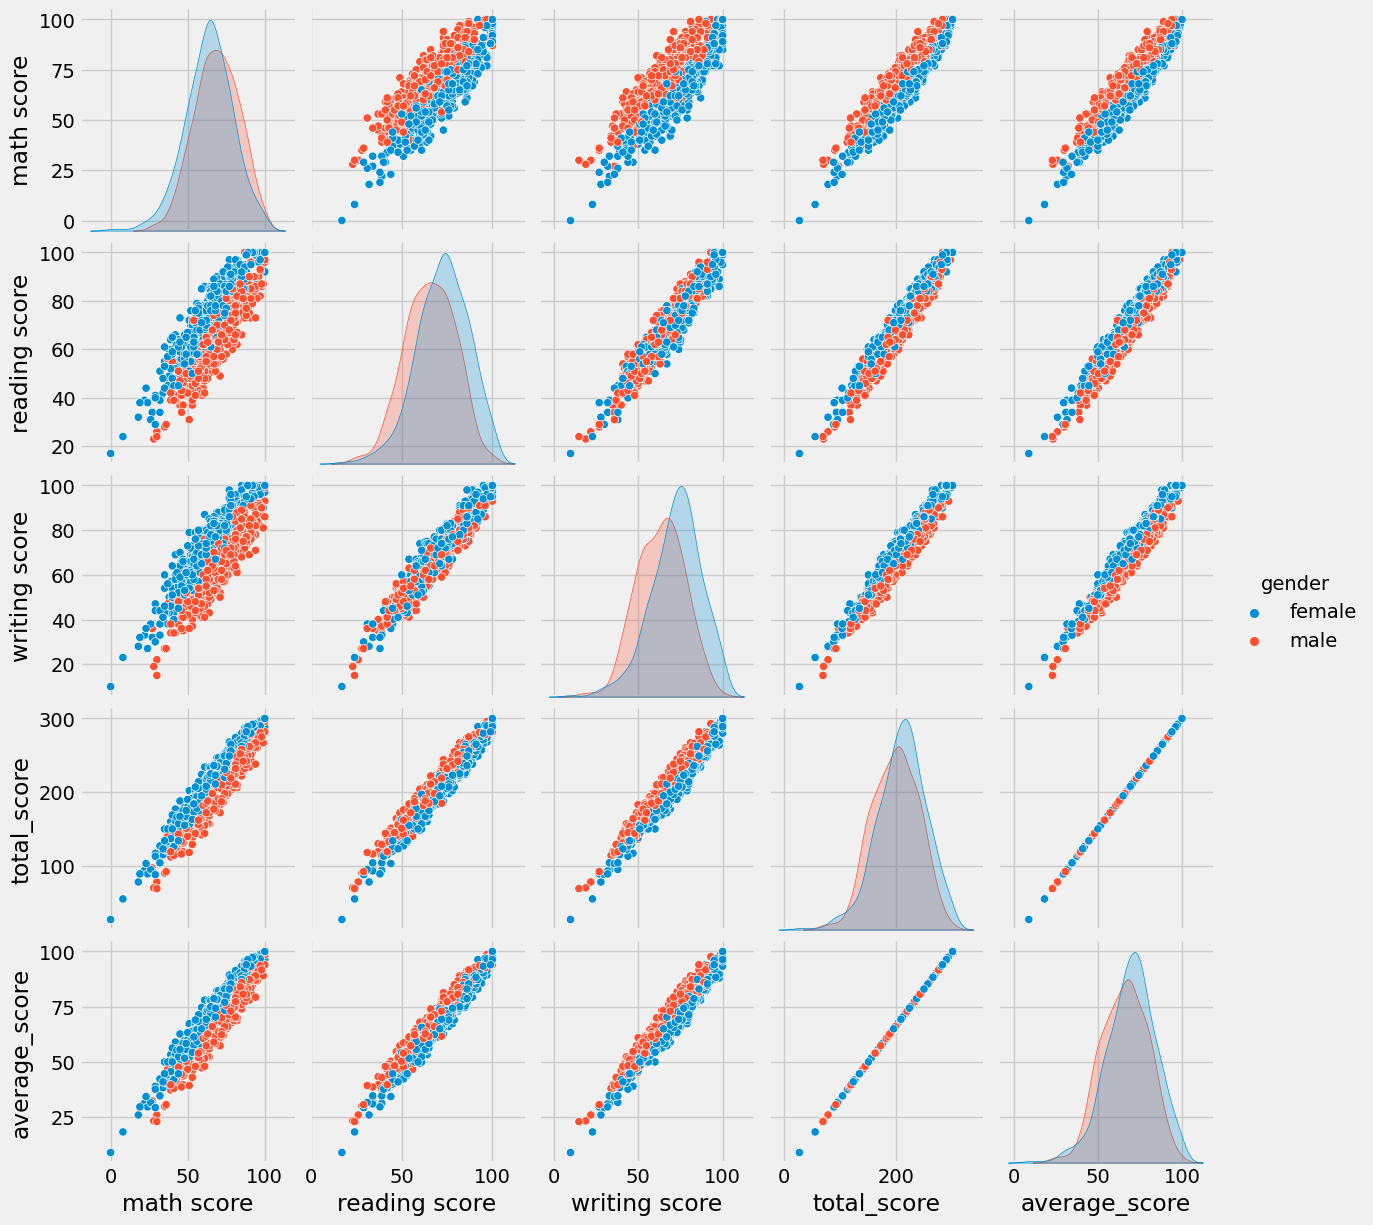

In [126]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### From the above plot it is clear that all the scores increase linearly with each other.

#### Conclusions
 - Student's Performance is related with lunch, race, parental level education
 - Females lead in pass percentage and also are top-scorers
 - Student's Performance is not much related with test preparation course
 - Finishing preparation course is benefitial.